# Deep Learning A Z Autoencoder Convolucional

In [ ]:
!pip install tensorflow==2.16.1

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib

In [ ]:
tf.__version__, np.__version__, matplotlib.__version__

('2.16.1', '1.26.4', '3.7.1')

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

In [ ]:
(X_treinamento, _), (X_teste, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_treinamento = X_treinamento.reshape(len(X_treinamento), 28, 28, 1)
X_teste = X_teste.reshape(len(X_teste), 28, 28, 1)

In [ ]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
X_treinamento = X_treinamento.astype('float32') / 255
X_teste = X_teste.astype('float32') / 255

In [ ]:
X_treinamento[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
# Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow/

autoencoder = Sequential()

# Codificador
autoencoder.add(InputLayer(shape = (28, 28, 1)))
autoencoder.add(Conv2D(filters = 16, kernel_size = (3,3), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size = (2,2)))
autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size = (2,2), padding='same'))
autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation='relu', padding='same', strides=(2,2)))
autoencoder.add(Flatten())

# Decodificador
autoencoder.add(Reshape((4, 4, 8)))
autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size = (2,2)))
autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size = (2,2)))
autoencoder.add(Conv2D(filters = 16, kernel_size = (3,3), activation='relu'))
autoencoder.add(UpSampling2D(size = (2,2)))
autoencoder.add(Conv2D(filters = 1, kernel_size = (3,3), activation='sigmoid', padding='same'))

autoencoder.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_81 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 13, 13, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_12 (Reshape)                 │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_84 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_18 (UpSampling2D)      │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_85 (Conv2D)                   │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_19 (UpSampling2D)      │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_86 (Conv2D)                   │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_20 (UpSampling2D)      │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_87 (Conv2D)                   │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.fit(X_treinamento, X_treinamento,
                epochs=10, batch_size=256,
                validation_data=(X_teste, X_teste))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 318ms/step - accuracy: 0.7652 - loss: 0.4267 - val_accuracy: 0.8001 - val_loss: 0.1577
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 72s 275ms/step - accuracy: 0.8015 - loss: 0.1491 - val_accuracy: 0.8054 - val_loss: 0.1292
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 274ms/step - accuracy: 0.8068 - loss: 0.1281 - val_accuracy: 0.8076 - val_loss: 0.1196
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 268ms/step - accuracy: 0.8086 - loss: 0.1189 - val_accuracy: 0.8086 - val_loss: 0.1124
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 269ms/step - accuracy: 0.8102 - loss: 0.1124 - val_accuracy: 0.8097 - val_loss: 0.1081
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 86s 287ms/step - accuracy: 0.8106 - loss: 0.1090 - val_accuracy: 0.8099 - val_loss: 0.1056
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 65s 279ms/step - accuracy: 0.8112 - loss: 0.1066 - val_accuracy: 0.8108 - val_loss: 0.1037
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 275ms/step - accuracy: 0.8117 - loss: 0

In [ ]:
encoder = Model(inputs=autoencoder.get_layer('conv2d_81').input,
                outputs = autoencoder.get_layer('flatten_19').output)
encoder.summary()

Model: "functional_181"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 13, 13, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 128)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,904 (7.44 KB)

 Trainable params: 1,904 (7.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
imagens_codificadas = encoder.predict(X_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [ ]:
imagens_codificadas.shape

(10000, 128)

In [ ]:
imagens_decodificadas = autoencoder.predict(X_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [ ]:
imagens_decodificadas.shape

(10000, 28, 28, 1)

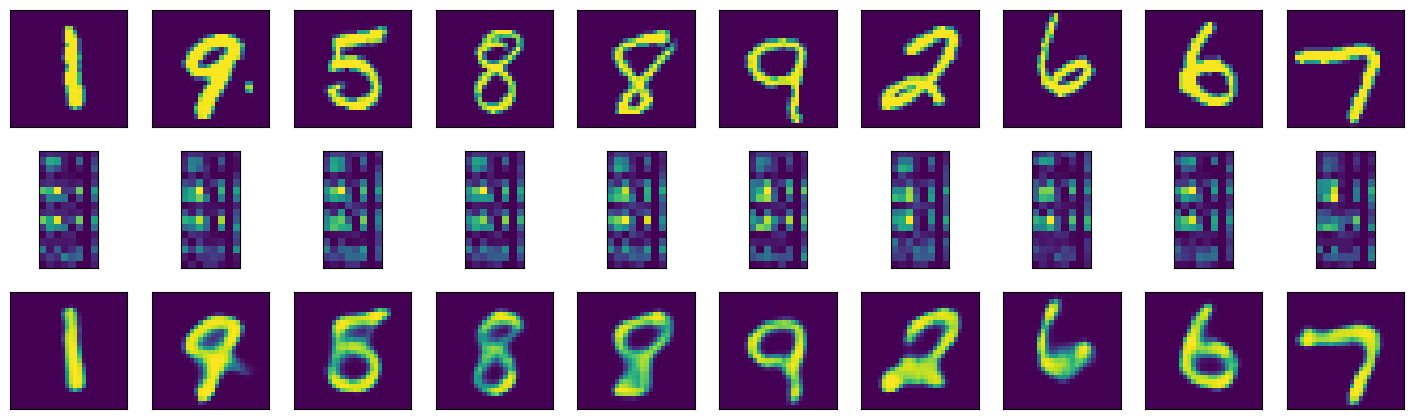

In [ ]:
numero_imagens = 10
imagens_teste = np.random.randint(X_teste.shape[0], size=numero_imagens)
plt.figure(figsize=(18,18))
for i, indice_imagem in enumerate(imagens_teste):
    # imagem original
    eixo = plt.subplot(10, 10, i + 1)
    plt.imshow(X_teste[indice_imagem].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())

    # imagem codificada
    eixo = plt.subplot(10, 10, i + 1 + numero_imagens)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(16, 8))
    plt.xticks(())
    plt.yticks(())

     # imagem reconstruída
    eixo = plt.subplot(10, 10, i + 1 + numero_imagens * 2)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())